In [1]:
import PIL.Image as Image, PIL.ImageDraw as ImageDraw, PIL.ImageFont as ImageFont
import matplotlib.pyplot as plt
%matplotlib inline 
import os 
import cv2
import numpy as np
import sys
import numpy
import scipy.ndimage as sni
from pprint import pprint


# from coreLib.dataset import DataSet
from __notes__.memo_utils import drawsPrintTextOnTable


## Create Table and place text on image

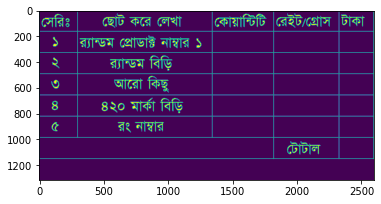

In [28]:
class_map_csv='/home/rezwanul/Desktop/Apsis_Bangla_Handwritten/synthdata/__notes__/class_map.csv'
font_path='/home/rezwanul/Desktop/Apsis_Bangla_Handwritten/synthdata/__notes__/Bangla.ttf'

printTextData = {'serial': ["সেরিঃ",  
                            "১",
                            "২",
                            "৩", 
                            "৪", 
                            "৫" ],
                 'brand': ["ছোট করে লেখা", 
                            "র‍্যান্ডম প্রোডাক্ট নাম্বার ১",
                            "র‍্যান্ডম বিড়ি",
                            "আরো কিছু",
                            "৪২০ মার্কা বিড়ি",
                            "রং নাম্বার"],
                 'quantity': ["কোয়ান্টিটি"],
                 'rate': ["রেইট/গ্রোস"], 
                 'taka': ["টাকা"]
                 
              }

total = ["টোটাল"]


Table_Image_with_Text, all_locs, labeled_img = drawsPrintTextOnTable(printTextData, total, class_map_csv, font_path)

TableImg = Table_Image_with_Text
TableImg[TableImg>0]=255
plt.imshow(TableImg)
plt.show()

In [29]:
all_locs

[1, 6, 11, 16, 21, 26, 2, 7, 12, 17, 22, 27, 3, 4, 5, 32]

In [30]:
# others_locs = [if i not all_locs for i in range(all_locs[-1])]

others_locs=[]

for i in range(1, all_locs[-1]+1):
#     print(i, end=" ")
    if i not in all_locs:
#         print(i)
        others_locs.append(i)
    
others_locs

[8, 9, 10, 13, 14, 15, 18, 19, 20, 23, 24, 25, 28, 29, 30, 31]

In [31]:
others_locs__ = [9, 15]
others_locs__

[9, 15]

In [6]:
from coreLib.dataset import DataSet
data_dir       = "/home/rezwanul/Desktop/Apsis_Bangla_Handwritten/synth_DataSet/sourcedata"
ds=DataSet(data_dir)
ds.common.symbols.df

#LOG     :All paths found


  0%|          | 0/200840 [00:00<?, ?it/s]

  0%|          | 0/72045 [00:00<?, ?it/s]

#LOG     :Processing Dictionary:/home/rezwanul/Desktop/Apsis_Bangla_Handwritten/synth_DataSet/sourcedata/bangla/dictionary.csv


  0%|          | 0/1059977 [00:00<?, ?it/s]

  0%|          | 0/46101 [00:00<?, ?it/s]

  0%|          | 0/10305 [00:00<?, ?it/s]

#LOG     :converting int labels to string


  0%|          | 0/10305 [00:00<?, ?it/s]

#LOG     :Processing Dictionary:/home/rezwanul/Desktop/Apsis_Bangla_Handwritten/synth_DataSet/sourcedata/english/dictionary.csv


  0%|          | 0/370098 [00:00<?, ?it/s]

  0%|          | 0/5975 [00:00<?, ?it/s]

#LOG     :bangla.graphemes


  0%|          | 0/200840 [00:00<?, ?it/s]

#LOG     :bangla.numbers


  0%|          | 0/72045 [00:00<?, ?it/s]

#LOG     :english.graphemes


  0%|          | 0/46101 [00:00<?, ?it/s]

#LOG     :english.numbers


  0%|          | 0/10305 [00:00<?, ?it/s]

#LOG     :common.symbols


  0%|          | 0/5975 [00:00<?, ?it/s]

#LOG     :bangla.fonts


  0%|          | 0/21 [00:00<?, ?it/s]

#LOG     :english.fonts


  0%|          | 0/2682 [00:00<?, ?it/s]

#LOG     :common.background


  0%|          | 0/982 [00:00<?, ?it/s]

#LOG     :common.noise.random


  0%|          | 0/112763 [00:00<?, ?it/s]

#LOG     :common.noise.sign


  0%|          | 0/3240 [00:00<?, ?it/s]

,filename,label,img_path
0,symbol_0,>,/home/rezwanul/Desktop/Apsis_Bangla_Handwritte...
1,symbol_1,>,/home/rezwanul/Desktop/Apsis_Bangla_Handwritte...
2,symbol_2,>,/home/rezwanul/Desktop/Apsis_Bangla_Handwritte...
3,symbol_3,>,/home/rezwanul/Desktop/Apsis_Bangla_Handwritte...
4,symbol_4,>,/home/rezwanul/Desktop/Apsis_Bangla_Handwritte...
...,...,...,...
5970,symbol_5970,<,/home/rezwanul/Desktop/Apsis_Bangla_Handwritte...
5971,symbol_5971,<,/home/rezwanul/Desktop/Apsis_Bangla_Handwritte...
5972,symbol_5972,<,/home/rezwanul/Desktop/Apsis_Bangla_Handwritte...
5973,symbol_5973,<,/home/rezwanul/Desktop/Apsis_Bangla_Handwritte...


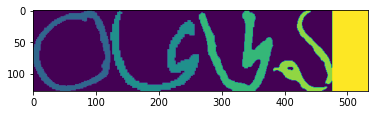

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
import numpy as np
iden=2
from coreLib.word import create_word
img,label,iden=create_word(iden,
                            "bangla",
                            "handwritten",
                            "number",
                            ds,
                            use_dict=True)
# max neutralization
plt.imshow(img)
plt.show()

In [33]:
imgs = []
for i in range(2, 4):
    img,label,iden=create_word(i,
                                "bangla",
                                "handwritten",
                                "number",
                                ds,
                                use_dict=True)
    imgs.append(img)

In [34]:
len(others_locs__)

2

In [35]:
len(imgs)

2

In [36]:
np.unique(labeled_img)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34], dtype=int32)

In [37]:
from __notes__.memo_utils import padImg

# padImg(line_img,h_max,w_max)

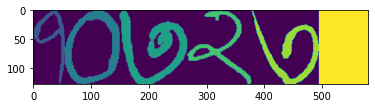

(128, 580)


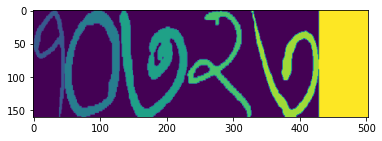

(160, 503)


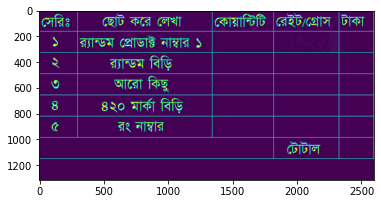

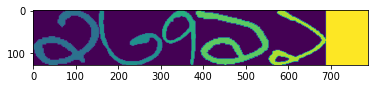

(128, 788)


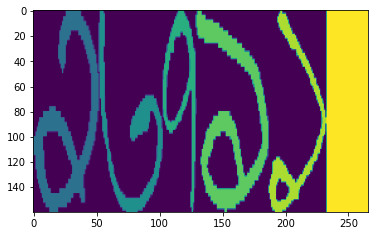

(160, 266)


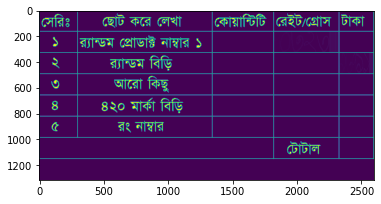

In [38]:
for i,img in zip(others_locs__,imgs):
    idx = np.where(labeled_img==i)
    y_min,y_max,x_min,x_max = np.min(idx[0]), np.max(idx[0]), np.min(idx[1]), np.max(idx[1])
#     TableImg[y_min:y_max,x_min:x_max]=0
#     print(y_min,y_max,x_min,x_max)
    
    plt.imshow(img)
    plt.show() 
    print(img.shape)
    
    h_max = abs(y_max-y_min)
    w_max = abs(x_max-x_min)
#     print(h_max, w_max)
#     img = padImg(img,h_max,w_max)
#     _img=cv2.resize(_img,(width,font_size)),fx=0,fy=0, interpolation = cv2.INTER_NEAREST)
#     _img=cv2.resize(img,(w_max,128),fx=0,fy=0, interpolation = cv2.INTER_NEAREST)

    dim = (h_max, w_max)
    _img = cv2.resize(img, dim[::-1], interpolation = cv2.INTER_AREA)
    
    plt.imshow(_img)
    plt.show() 
    print(_img.shape)
    
    TableImg[y_min:y_max,x_min:x_max]=_img

    plt.imshow(TableImg)
    plt.show() 

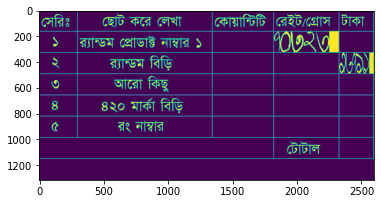

In [39]:
TableImg[TableImg>0]=255
plt.imshow(TableImg)
plt.show()

In [ ]:
# ## Place text on specific location of TableImg
# for locs, pads in zip(all_locs, padded_all):
#   for i,img in zip([locs],[pads]):
#     idx = np.where(labeled_img==i)
#     y_min,y_max,x_min,x_max = np.min(idx[0]), np.max(idx[0]), np.min(idx[1]), np.max(idx[1])
#     TableImg[y_min:y_max,x_min:x_max]=img

#     # plt.imshow(TableImg)
#     # plt.show() 

# return TableImg  